# Olist E-Commerce Business Analysis

## Objective


The objective of this analysis is to evaluate revenue integrity, customer purchasing behavior, and payment dynamics within the Olist e-commerce platform. The study aims to verify consistency between transactional and payment records, assess revenue concentration patterns, and understand how customer type and payment methods influence overall revenue structure.

## Dataset used

This analysis uses the Olist E-Commerce dataset, which contains transactional data from a Brazilian marketplace. The following tables were utilized:

orders – Contains order-level information including order status and timestamps.

order_items – Contains product-level pricing and freight values for each order.

payments – Contains payment records, including payment value, type, and installment information.

customers – Contains customer identifiers, including a unique customer ID to track repeat behavior.

The dataset enables analysis at three levels of granularity:

Item-level (product pricing)

Order-level (transaction value)

Customer-level (behavior and retention)

## Questions to answer

Revenue Integrity

Does item-level revenue align with payment-level revenue?

Are there significant discrepancies between systems?

Revenue Distribution

What is total revenue and average order value?

Is revenue distribution skewed?

What percentage of revenue is generated by the top 20% of orders?

Revenue Concentration

What percentage of revenue is generated by the top 20% of customers?

Customer Retention

How many customers are repeat vs one-time?

What share of revenue comes from repeat customers?

Payment Behavior

What are the dominant payment methods?

Do high-value orders rely heavily on specific payment types?

How does installment usage relate to order value?

## Importing Files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv("Brazilian E-Commerce Public Dataset by Olist/olist_orders_dataset.csv")
customers = pd.read_csv("Brazilian E-Commerce Public Dataset by Olist/olist_customers_dataset.csv")
payments = pd.read_csv("Brazilian E-Commerce Public Dataset by Olist/olist_order_payments_dataset.csv")
order_items  = pd.read_csv("Brazilian E-Commerce Public Dataset by Olist/olist_order_items_dataset.csv")




# 1: Data Understanding & Planning

#### Orders

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [5]:
orders.info()

<class 'pandas.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   order_id                       99441 non-null  str  
 1   customer_id                    99441 non-null  str  
 2   order_status                   99441 non-null  str  
 3   order_purchase_timestamp       99441 non-null  str  
 4   order_approved_at              99281 non-null  str  
 5   order_delivered_carrier_date   97658 non-null  str  
 6   order_delivered_customer_date  96476 non-null  str  
 7   order_estimated_delivery_date  99441 non-null  str  
dtypes: str(8)
memory usage: 6.1 MB


In [6]:
orders.shape

(99441, 8)

#### Customers

In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
customers.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [9]:
customers.info()

<class 'pandas.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   customer_id               99441 non-null  str  
 1   customer_unique_id        99441 non-null  str  
 2   customer_zip_code_prefix  99441 non-null  int64
 3   customer_city             99441 non-null  str  
 4   customer_state            99441 non-null  str  
dtypes: int64(1), str(4)
memory usage: 3.8 MB


In [10]:
customers.shape

(99441, 5)

#### Payments

In [11]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
payments.tail()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [13]:
payments.info()

<class 'pandas.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  str    
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  str    
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), str(2)
memory usage: 4.0 MB


In [14]:
payments.shape

(103886, 5)

In [15]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [16]:
payments[["payment_installments"]].value_counts()

payment_installments
1                       52546
2                       12413
3                       10461
4                        7098
10                       5328
5                        5239
8                        4268
6                        3920
7                        1626
9                         644
12                        133
15                         74
18                         27
11                         23
24                         18
20                         17
13                         16
14                         15
17                          8
16                          5
21                          3
0                           2
22                          1
23                          1
Name: count, dtype: int64

In [17]:
payments["payment_type"].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

#### Order_items

In [18]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [19]:
order_items.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [20]:
order_items.info()

<class 'pandas.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  str    
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  str    
 3   seller_id            112650 non-null  str    
 4   shipping_limit_date  112650 non-null  str    
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), str(4)
memory usage: 6.0 MB


In [21]:
order_items.shape

(112650, 7)

In [22]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Understanding Each table 

#### orders Table

 Several timestamp columns in the orders table contain missing values, particularly those related to approval, shipping, and delivery. These missing values likely correspond to orders that were cancelled or did not progress through the full fulfillment pipeline. This suggests that order status will be critical in determining how these records should be handled during cleaning and analysis.

#### customers Table

The customers table contains no missing values and provides location information at the city, state, and zip code level. It includes both a technical customer identifier and a unique customer identifier, suggesting that multiple orders from the same individual may be represented by different customer IDs. This distinction will be important for accurately identifying repeat customers and aggregating customer-level metrics.

#### payments Table

The Payments table contains columns like order id, Payment type, Payment value, No of installments and etc. The payments table contains more rows than the orders table, indicating that a single order can be associated with multiple payment records. This suggests a one-to-many relationship between orders and payments. As a result, revenue calculations and order-level metrics could be inflated if this table is joined directly without proper aggregation.

#### order_items table

The order_items table contains item-level information for each order, including product, seller, pricing, and shipping details. The table has more rows than the orders table, indicating that a single order can be associated with multiple order items. This confirms a one-to-many relationship between orders and order items. As a result, order-level metrics and revenue calculations could be inflated if this table is joined directly without proper aggregation to the order level.

## Summary

I trust the customers table the most because it is complete, contains no missing values, and represents stable customer-level information without any one-to-many relationship risks.

I trust the payments table the least because it contains more rows than the orders table, indicating a one-to-many relationship where a single order can have multiple payment records. This creates a high risk of duplicating orders and inflating revenue if joins are performed without proper aggregation.

The order_items table would require explicit assumptions, as it operates at the item level rather than the order level. Aggregation decisions would be necessary to correctly compute order-level metrics without introducing bias or inflation.

# 2. Cleaning


In [23]:
orders = orders[orders["order_status"] == "delivered"]


I just now have orders which are delivered.

In [24]:
customers = customers[customers["customer_id"].isin(orders["customer_id"])]
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


I just have customers whose orders were delivered now.
    

In [25]:
payments = payments[payments["order_id"].isin(orders["order_id"])]
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


I just have Payments whose orders were delivered now.


In [26]:
order_items = order_items[order_items["order_id"].isin(orders["order_id"])]

I just have Order_items whose orders were delivered now.


# 3. EDA

### 3.1 Checking revenue integrity

In [27]:
real_orders = order_items[order_items["order_id"].isin(orders["order_id"])].groupby("order_id")[["price","freight_value"]].sum().reset_index()
new_orders_with_price_and_freight = orders.merge(real_orders,on="order_id",how="left")
new_orders_with_price_and_freight["total_value"] = new_orders_with_price_and_freight["price"] + new_orders_with_price_and_freight["freight_value"]
new_orders_with_price_and_freight

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,total_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,19.90,8.72,28.62
...,...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,72.00,13.08,85.08
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,174.90,20.10,195.00
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,205.99,65.02,271.01
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,359.98,81.18,441.16


now I made new orders table in which order price, freight value, total value were there, and those too only whose order_id was in orders table i.e. only delivered ones.

In [28]:
total_payments = payments[payments["order_id"].isin(orders["order_id"])].groupby("order_id")["payment_value"].sum()
new_orders_with_price_and_freight_and_payments = new_orders_with_price_and_freight.merge(total_payments,on="order_id",how="left")
new_orders_with_price_and_freight_and_payments


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,total_value,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,29.99,8.72,38.71,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,118.70,22.76,141.46,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,159.90,19.22,179.12,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,45.00,27.20,72.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,19.90,8.72,28.62,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,72.00,13.08,85.08,85.08
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,174.90,20.10,195.00,195.00
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,205.99,65.02,271.01,271.01
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,359.98,81.18,441.16,441.16


Now I added payment value in a new orders table according to the order_id. And only kept those whose order_id was in orders, i.e only which one were delivered.

In [29]:
new_orders_with_price_and_freight_and_payments["payment_value"].sum()

np.float64(15422461.77)

In [30]:
new_orders_with_price_and_freight_and_payments["total_value"].sum()

np.float64(15419773.75)

Now here I can see that total payment value is more than total value.

In [31]:
new_orders_with_price_and_freight_and_payments["revenue_payment_compare"] = new_orders_with_price_and_freight_and_payments["payment_value"] - new_orders_with_price_and_freight_and_payments["total_value"]
new_orders_with_price_and_freight_and_payments["revenue_payment_compare"].describe()

count    96477.000000
mean         0.029349
std          1.138706
min        -51.620000
25%          0.000000
50%          0.000000
75%          0.000000
max        182.810000
Name: revenue_payment_compare, dtype: float64

In [32]:
difference = new_orders_with_price_and_freight_and_payments[new_orders_with_price_and_freight_and_payments["revenue_payment_compare"].abs()>10]
ratio = len(difference) / len(new_orders_with_price_and_freight_and_payments)
ratio

0.0010054105599203963


### Revenue recorded at item-level and payment-level is highly consistent, with negligible average deviation and minimal outliers

### 3.2 Checking Revenue Distribution

##### Total revenue

In [33]:
total_revenue = new_orders_with_price_and_freight_and_payments["payment_value"].sum()
mean_revenue = new_orders_with_price_and_freight_and_payments["payment_value"].mean()
median_revenue = new_orders_with_price_and_freight_and_payments["payment_value"].median()
total_revenue,mean_revenue,median_revenue

(np.float64(15422461.77), np.float64(159.8563571628471), np.float64(105.28))

In [34]:
new_orders_with_price_and_freight_and_payments["payment_value"].describe()

count    96477.000000
mean       159.856357
std        218.813144
min          9.590000
25%         61.880000
50%        105.280000
75%        176.330000
max      13664.080000
Name: payment_value, dtype: float64

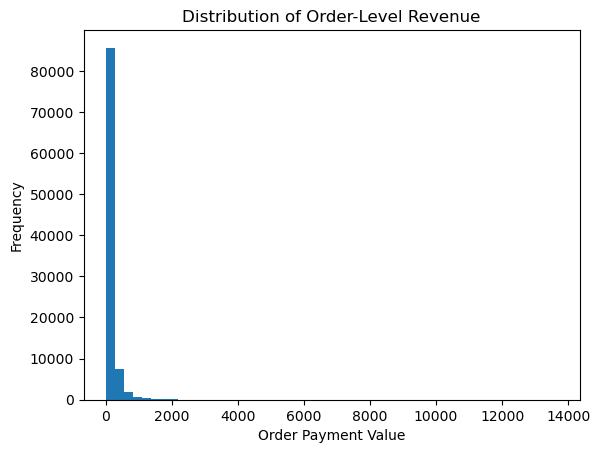

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(new_orders_with_price_and_freight_and_payments["payment_value"], bins=50)
plt.xlabel("Order Payment Value")
plt.ylabel("Frequency")
plt.title("Distribution of Order-Level Revenue")
plt.show()

In [36]:
new_orders_with_price_and_freight_and_payments["payment_value"].skew()

np.float64(9.366867752220806)

In [37]:
top_20_orders_share = new_orders_with_price_and_freight_and_payments["payment_value"].sort_values(ascending=False).head(int(0.2 * len(new_orders_with_price_and_freight_and_payments["payment_value"]))).sum()/new_orders_with_price_and_freight_and_payments["payment_value"].sum() * 100
top_20_orders_share

np.float64(53.1906483046513)

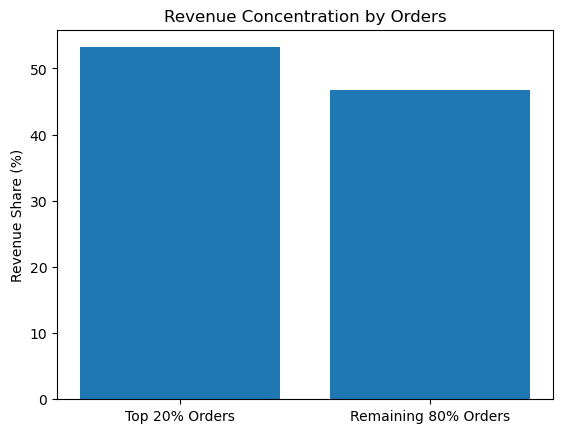

In [38]:
plt.figure()
plt.bar(
    ["Top 20% Orders", "Remaining 80% Orders"],
    [top_20_orders_share, 100 - top_20_orders_share]
)
plt.ylabel("Revenue Share (%)")
plt.title("Revenue Concentration by Orders")
plt.show()


## Top 20% orders → 53% revenue

## Revenue generation is moderately concentrated at the transaction level, with the top 20% of orders contributing over half of total revenue, reflecting a skewed but not extreme dependency on high-value purchases.

### 3.3 Checking revenue concentration


In [39]:
new_orders_with_price_and_freight_and_payments.sort_values(by="payment_value",ascending=False).head(int(0.2 * len(new_orders_with_price_and_freight_and_payments)))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,total_value,payment_value,revenue_payment_compare
13014,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,13440.00,224.08,13664.08,13664.08,0.0
64607,736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02 00:00:00,7160.00,114.88,7274.88,7274.88,0.0
21526,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,6735.00,194.31,6929.31,6929.31,0.0
27503,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,6729.00,193.21,6922.21,6922.21,0.0
3413,f5136e38d1a14a4dbd87dff67da82701,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,6499.00,227.66,6726.66,6726.66,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64293,98851e1a5afa44197e521fc8656fa598,15c502883c5a88805a3d30df33ec577d,delivered,2017-10-01 17:52:59,2017-10-01 18:07:19,2017-10-03 12:26:06,2017-10-11 04:43:53,2017-10-30 00:00:00,182.99,18.85,201.84,201.84,0.0
53306,bf61d525b7c099d79f6e3bbbd7a4aec9,f882d8943a6e76b0876c6affb9ac2dfb,delivered,2018-03-02 16:59:19,2018-03-02 17:10:48,2018-03-05 19:17:34,2018-03-10 01:38:47,2018-03-22 00:00:00,169.90,31.94,201.84,201.84,0.0
3337,e2d3e5a5b56149b36e4df4dedd8648f5,57f4770b4fc8ae0c610fd9821dc38403,delivered,2018-02-12 12:39:57,2018-02-13 13:28:09,2018-02-14 22:38:57,2018-03-05 20:38:39,2018-03-13 00:00:00,169.90,31.94,201.84,201.84,0.0
71495,c7b2b75e4013ba825f8617a06936a014,4447740ba0a171df89769758c72f15cc,delivered,2017-02-08 08:36:00,2017-02-10 02:45:21,2017-02-11 09:38:05,2017-02-20 09:18:42,2017-03-21 00:00:00,169.90,31.93,201.83,201.83,0.0


In [40]:
new_orders_with_price_and_freight_and_payments_and_uniquecustomerid = new_orders_with_price_and_freight_and_payments.merge(customers[["customer_id","customer_unique_id"]],on="customer_id",how="left")
top_20_customers_share = new_orders_with_price_and_freight_and_payments_and_uniquecustomerid.groupby("customer_unique_id")["payment_value"].sum().sort_values(ascending=False).head(int(0.2 * len(new_orders_with_price_and_freight_and_payments_and_uniquecustomerid))).sum() / new_orders_with_price_and_freight_and_payments_and_uniquecustomerid["payment_value"].sum() *100
top_20_customers_share

np.float64(54.35992369459445)

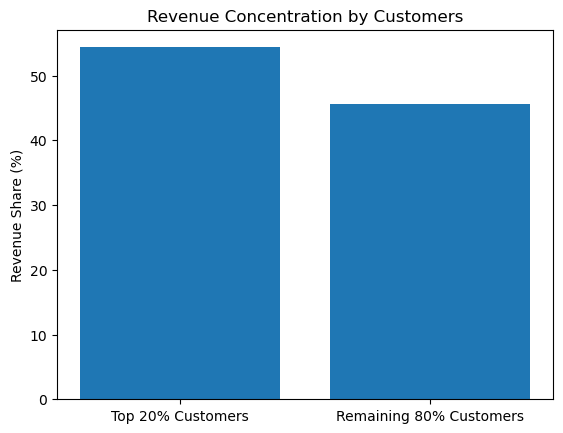

In [41]:
plt.figure()
plt.bar(
    ["Top 20% Customers", "Remaining 80% Customers"],
    [top_20_customers_share, 100 - top_20_customers_share]
)
plt.ylabel("Revenue Share (%)")
plt.title("Revenue Concentration by Customers")
plt.show()


## Top 20% customers → 54% revenue



## Revenue is moderately concentrated among high-value customers.



### 3.4 Defining Repeat Customers

In [42]:
customer_repeat_value = new_orders_with_price_and_freight_and_payments_and_uniquecustomerid.groupby("customer_unique_id")["order_id"].nunique().reset_index()
customer_repeat_value.rename(columns={"order_id":"order_count"},inplace=True)
customer_repeat_value["repeat_customer"] = customer_repeat_value["order_count"].apply(lambda x: "yes" if x>1 else "no")
customer_repeat_value.sort_values(by="order_count",ascending=False)

,customer_unique_id,order_count,repeat_customer
51431,8d50f5eadf50201ccdcedfb9e2ac8455,15,yes
22779,3e43e6105506432c953e165fb2acf44c,9,yes
36706,6469f99c1f9dfae7733b25662e7f1782,7,yes
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,7,yes
73921,ca77025e7201e3b30c44b472ff346268,7,yes
...,...,...,...
93337,ffee94d548cef05b146d825a7648dab4,1,no
93338,ffeefd086fc667aaf6595c8fe3d22d54,1,no
93339,ffef0ffa736c7b3d9af741611089729b,1,no
93340,fff1afc79f6b5db1e235a4a6c30ceda7,1,no


In [43]:
customer_value = new_orders_with_price_and_freight_and_payments_and_uniquecustomerid.groupby("customer_unique_id")["payment_value"].sum().reset_index()
customer_repeat_value_analysis = customer_repeat_value.merge(customer_value,on="customer_unique_id",how="left")
customer_repeat_value_analysis


,customer_unique_id,order_count,repeat_customer,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,1,no,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,no,27.19
2,0000f46a3911fa3c0805444483337064,1,no,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1,no,43.62
4,0004aac84e0df4da2b147fca70cf8255,1,no,196.89
...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1,no,2067.42
93354,fffea47cd6d3cc0a88bd621562a9d061,1,no,84.58
93355,ffff371b4d645b6ecea244b27531430a,1,no,112.46
93356,ffff5962728ec6157033ef9805bacc48,1,no,133.69


In [44]:
customer_repeat_value_analysis.groupby("repeat_customer")["payment_value"].describe()

,count,mean,std,min,25%,50%,75%,max
repeat_customer,,,,,,,,
no,90557.0,160.761781,221.449520,0.00,62.01,105.39,176.76,13664.08
yes,2801.0,308.588793,316.979193,35.94,147.13,225.55,361.02,7571.63


In [45]:
repeat_share = customer_repeat_value_analysis.groupby("repeat_customer")["payment_value"].sum()/customer_repeat_value_analysis["payment_value"].sum() *100
repeat_share

repeat_customer
no     94.395465
yes     5.604535
Name: payment_value, dtype: float64

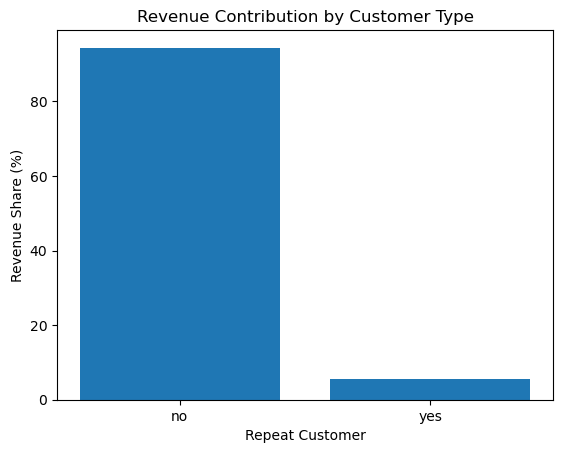

In [46]:
plt.figure()
plt.bar(repeat_share.index, repeat_share.values)
plt.xlabel("Repeat Customer")
plt.ylabel("Revenue Share (%)")
plt.title("Revenue Contribution by Customer Type")
plt.show()

## Revenue concentration exists, but it is not driven by loyal repeat customers. The platform appears acquisition-heavy rather than retention-driven.


## Revenue is largely driven by one-time customers, indicating weak retention and acquisition-heavy growth.

### 3.5 Checking Payment Method Distribution

In [47]:
payments.groupby("payment_type").size()

payment_type
boleto         19191
credit_card    74586
debit_card      1486
voucher         5493
dtype: int64

In [48]:
payments.groupby("order_id")["payment_type"].count().sort_values(ascending=False)

order_id
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
ee9ca989fc93ba09a6eddc250ce01742    19
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
fff1e3e76b816bfe8ef16678cc53c643     1
fff2cdc825f9fc0ba3c04227cfa02303     1
fff2e9e3aa8644e19710216b4ef53ab2     1
fff3983dfa3c5a0d752d8d17baa406a0     1
00048cc3ae777c65dbb7d2a0634bc1ea     1
Name: payment_type, Length: 96477, dtype: int64

In [49]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [50]:
new_orders_with_price_and_freight_and_payments_and_uniquecustomerid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,total_value,payment_value,revenue_payment_compare,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,29.99,8.72,38.71,38.71,0.000000e+00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,118.70,22.76,141.46,141.46,0.000000e+00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,159.90,19.22,179.12,179.12,0.000000e+00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,45.00,27.20,72.20,72.20,0.000000e+00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,19.90,8.72,28.62,28.62,3.552714e-15,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,72.00,13.08,85.08,85.08,0.000000e+00,6359f309b166b0196dbf7ad2ac62bb5a
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,174.90,20.10,195.00,195.00,0.000000e+00,da62f9e57a76d978d02ab5362c509660
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,205.99,65.02,271.01,271.01,0.000000e+00,737520a9aad80b3fbbdad19b66b37b30
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,359.98,81.18,441.16,441.16,0.000000e+00,5097a5312c8b157bb7be58ae360ef43c


In [51]:
a = payments.groupby(["order_id","payment_type","payment_installments"])["payment_value"].sum().reset_index().sort_values(by="payment_value",ascending=False)
a.sort_values(by="payment_value",ascending=False).head(int(0.2 *len(a))).groupby("payment_type")["payment_value"].sum()/a["payment_value"].sort_values(ascending=False).head(int(0.2 * len(a))).sum() *100

payment_type
boleto         16.545370
credit_card    80.902213
debit_card      1.234797
voucher         1.317620
Name: payment_value, dtype: float64

In [52]:
payments.groupby("order_id")["payment_type"].count().sort_values(ascending=False).head(50)


order_id
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
ee9ca989fc93ba09a6eddc250ce01742    19
fedcd9f7ccdc8cba3a18defedd1a5547    19
4bfcba9e084f46c8e3cb49b0fa6e6159    15
21577126c19bf11a0b91592e5844ba78    15
4689b1816de42507a7d63a4617383c59    14
3c58bffb70dcf45f12bdf66a3c215905    14
73df5d6adbeea12c8ae03df93f346e86    13
cf101c3abd3c061ca9f78c1bbb1125af    13
4fb76fa13b108a0d0478483421b0992c    13
1a611328643ae11146ba09a4425d2e12    12
1d9a9731b9c10fc9cba74e6f74782e8b    12
67d83bd36ec2c7fb557742fb58837659    12
6d58638e32674bebee793a47ac4cbadc    12
d744783ed2ace06cac647a9e64dcbcfd    12
465c2e1bee4561cb39e0db8c5993aafc    12
68986e4324f6a21481df4e6e89abcf01    12
c6492b842ac190db807c15aff21a7dd6    12
4069c489933782af79afcd3a0e4d693c    11
370e2e6c1a9fd451eb7f0852daa3b006    11
d2e18fcf7ecfd667af457a9e7034c86a    11
0bbb3f7791a87d0307555e57da3a1ff1    11
b0f913cb83681e8a8563b96b641b3e1b    11
27a940efdd448db2

In [53]:
a[a["order_id"] == "68986e4324f6a21481df4e6e89abcf01"]

,order_id,payment_type,payment_installments,payment_value
40397,68986e4324f6a21481df4e6e89abcf01,voucher,1,329.22


In [54]:
a[a["order_id"] == "d3f44296d90a42d3ec4b52b18654e87a"]

,order_id,payment_type,payment_installments,payment_value
81969,d3f44296d90a42d3ec4b52b18654e87a,voucher,1,35.0


In [55]:
a[a["order_id"] == "ccf804e764ed5650cd8759557269dc13"]

,order_id,payment_type,payment_installments,payment_value
79107,ccf804e764ed5650cd8759557269dc13,voucher,1,60.48
79106,ccf804e764ed5650cd8759557269dc13,credit_card,1,2.20


Mostly payements which are done more than once, are with vouchers and the excess left with credit cards.

Top 20% payments are mostly done by credit cards (80%) which is followed by boleto (16%).

High-value purchases are overwhelmingly financed via credit cards.

In [56]:
a.groupby("payment_installments").describe()

payment_value                                            \
                             count        mean         std     min       25%   
payment_installments                                                           
0                              2.0   94.315000   50.381358   58.69   76.5025   
1                          49066.0  115.932165  178.097569    0.01   46.5300   
2                          12052.0  126.832201  107.242052   20.03   64.0900   
3                          10147.0  142.237908  131.333130   30.00   67.4950   
4                           6882.0  163.854602  171.964931   40.00   71.4250   
5                           5090.0  182.482855  198.390319   49.99   75.1775   
6                           3800.0  208.760211  220.404923   59.99   79.7375   
7                           1560.0  186.309731  199.614456   69.97   76.7875   
8                           4122.0  307.326924  332.397401   37.58  130.0600   
9                            618.0  197.971197  176.412304   90.11   95.3550   
10                          5137.0  411.576387  449.002818   37.67  155.3600   
11                            22.0  125.597273   23.047133  110.43  114.5350   
12                           128.0  324.408672  310.095425  121.09  142.0675   
13                            15.0  151.826667   39.777308  130.57  134.3250   
14                            14.0  169.360000   73.032294  139.98  144.5475   
15                            72.0  431.128194  430.612543  151.93  194.7475   
16                             5.0  292.694000  211.546161  160.12  164.1700   
17                             7.0  174.522857    2.852483  170.00  172.7550   
18                            27.0  486.483333  367.222596  180.76  228.7700   
20                            16.0  641.784375  486.792759  206.99  310.5950   
21                             3.0  243.700000   51.411933  212.03  214.0400   
22                             1.0  228.710000         NaN  228.71  228.7100   
23                             1.0  236.480000         NaN  236.48  236.4800   
24                            18.0  610.048889  342.152398  241.42  330.3750   

                                                   
                          50%       75%       max  
payment_installments                               
0                      94.315  112.1275    129.94  
1                      76.375  130.6900  13664.08  
2                     109.680  155.7300   2105.57  
3                     110.550  175.4900   3256.14  
4                     116.940  207.2125   3126.50  
5                     125.910  223.3575   4042.74  
6                     138.335  240.0225   2828.42  
7                     139.950  193.8550   2094.44  
8                     211.910  357.5800   6929.31  
9                      99.900  211.4350   1225.99  
10                    238.070  481.5200   4950.34  
11                    116.590  118.7150    198.83  
12                    199.080  330.7475   1543.25  
13                    136.890  138.2850    278.00  
14                    146.720  149.6250    417.45  
15                    255.850  415.2250   2647.76  
16                    167.370  320.7600    651.05  
17                    175.040  176.5600    177.99  
18                    335.890  526.1400   1232.85  
20                    465.465  829.8300   2022.33  
21                    216.050  259.5350    303.02  
22                    228.710  228.7100    228.71  
23                    236.480  236.4800    236.48  
24                    593.880  724.7775   1440.10

In [57]:
a.groupby("payment_installments").aggregate({"payment_installments":"count","payment_value":"sum"})

,payment_installments,payment_value
payment_installments,,
0,2,188.63
1,49066,5688327.62
2,12052,1528581.69
3,10147,1443288.05
4,6882,1127647.37
5,5090,928837.73
6,3800,793288.80
7,1560,290643.18
8,4122,1266801.58


Larger valued purchases have more installments which means large value payments are financed.

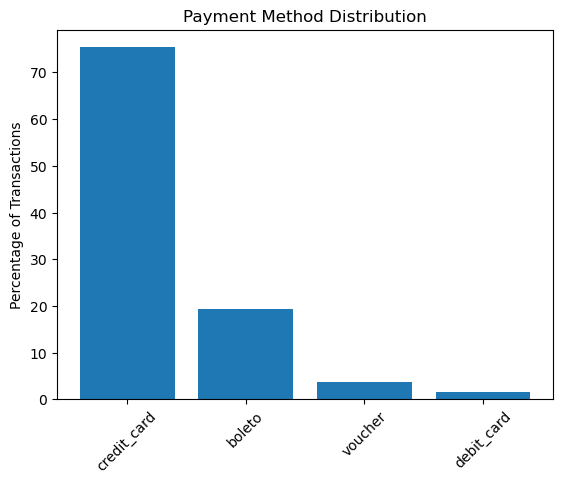

In [58]:
payment_distribution = a["payment_type"].value_counts(normalize=True) * 100

plt.figure()
plt.bar(payment_distribution.index, payment_distribution.values)
plt.xticks(rotation=45)
plt.ylabel("Percentage of Transactions")
plt.title("Payment Method Distribution")
plt.show()

# 4. Key Insights and Conclusions

#### High-value transactions are heavily dependent on credit card payments, indicating that financing flexibility plays a significant role in driving larger order values.

#### Revenue is highly dependent on credit card infrastructure, especially for high-value transactions, making payment system stability strategically important.

# Summary

### This analysis was conducted to evaluate revenue integrity, customer purchasing behavior, and payment dynamics within the e-commerce platform.

### Revenue reconciliation between item-level and payment-level records shows strong consistency, with negligible average discrepancy and only a very small fraction of orders exhibiting meaningful variance. This indicates high financial data integrity and reliable revenue reporting across systems.

### Revenue distribution is moderately right-skewed. The top 20% of orders contribute approximately 53% of total revenue, while the top 20% of customers account for roughly 54% of revenue. This suggests a moderate concentration of revenue among high-value transactions and customers, though not an extreme dependency on a very small segment.

### However, repeat customers contribute only around 5–6% of total revenue, indicating that the platform’s revenue model is predominantly acquisition-driven rather than retention-driven. The majority of revenue originates from one-time customers.

### Credit card payments dominate overall transactions and account for nearly 80% of high-value orders. This suggests that credit-based payment mechanisms play a significant role in enabling larger purchases, highlighting operational dependency on credit infrastructure for high-value transactions.

### Overall, the business exhibits moderate revenue concentration, low customer retention, and strong reliance on credit card payments for high-value sales. Strategic focus on improving customer retention and diversifying payment dependency may enhance long-term revenue stability.